Start by importing the csv files

In [242]:
import pandas as pd

baseline_file = "baseline_DrugCombDB_test_results.csv"
shuffle_file = "rewire_graph_DrugCombDB_test_results_.csv"

base_df = pd.read_csv(baseline_file)
shuffle_df = pd.read_csv(shuffle_file)

Merge the two dataframes

In [243]:
shuffle_df = shuffle_df
shuffle_df = shuffle_df.drop("fold_id", axis=1).drop("graph_function", axis=1)

base_df = base_df.drop("fold_id", axis=1)
base_df["graph_ratio"] = 0.0

merged_df = pd.concat([shuffle_df, base_df], ignore_index=True)
merged_df = merged_df.groupby('graph_ratio').mean().reset_index()


Now lets visualize the data

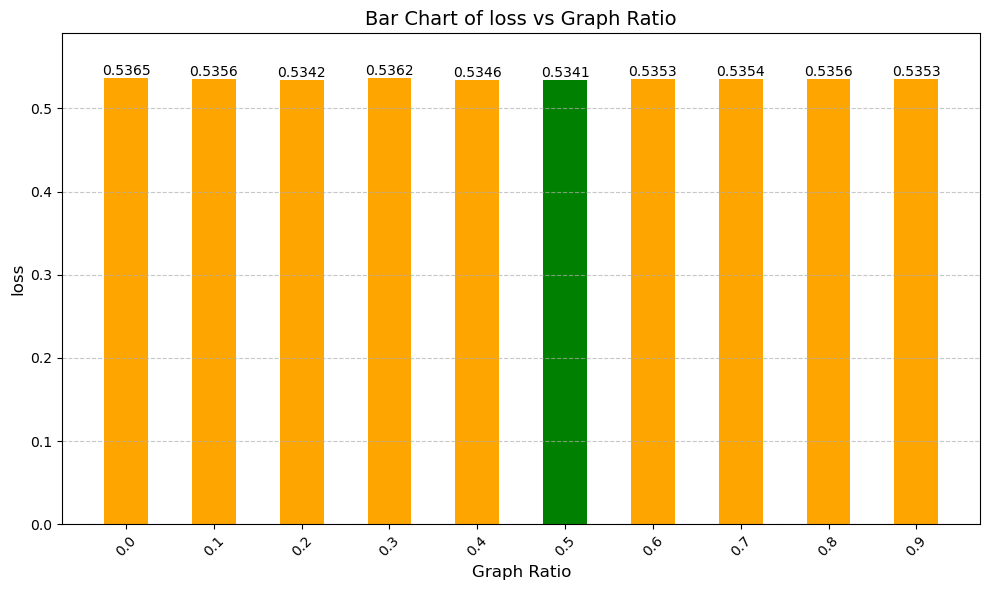

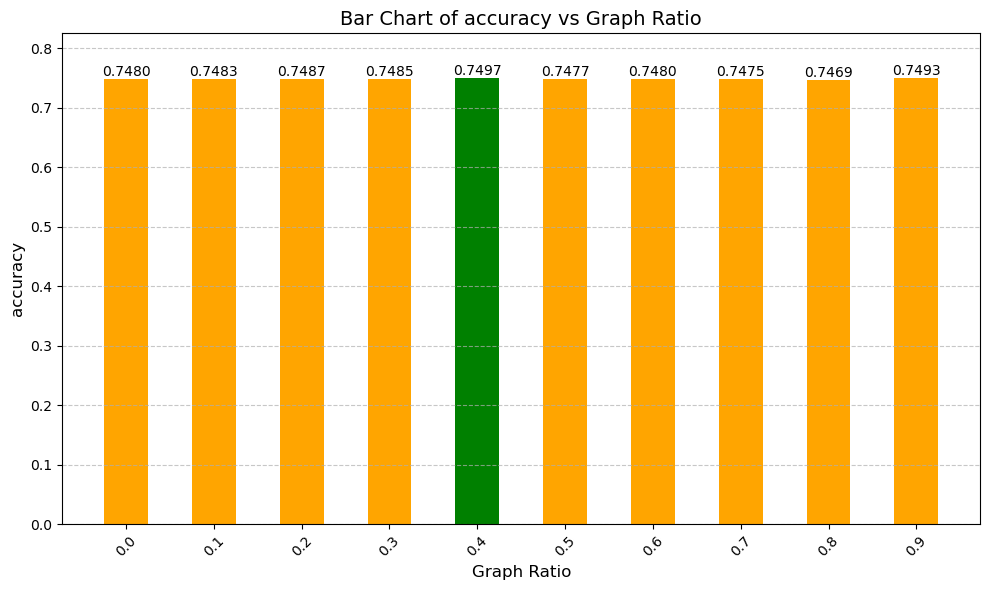

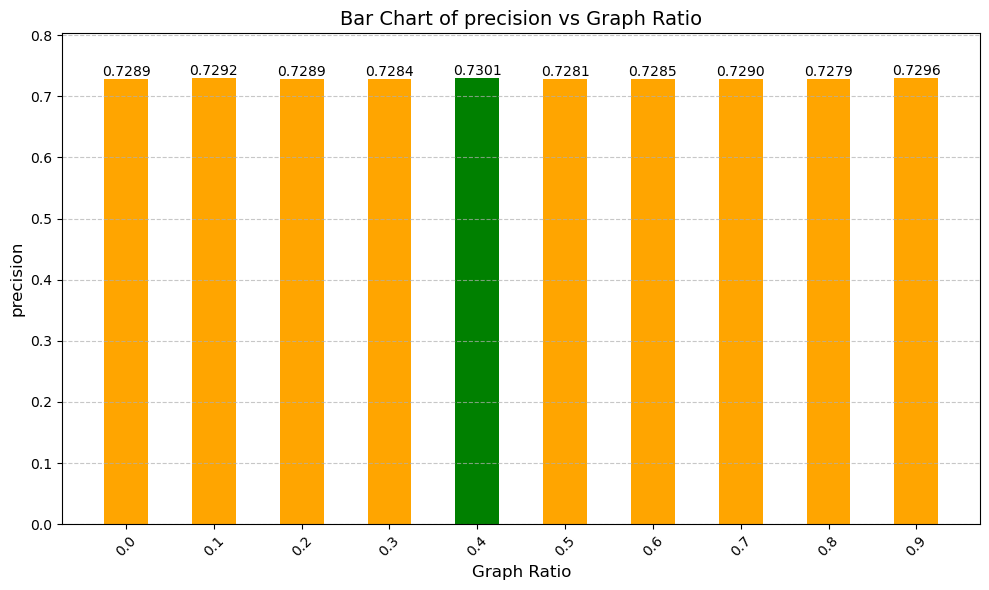

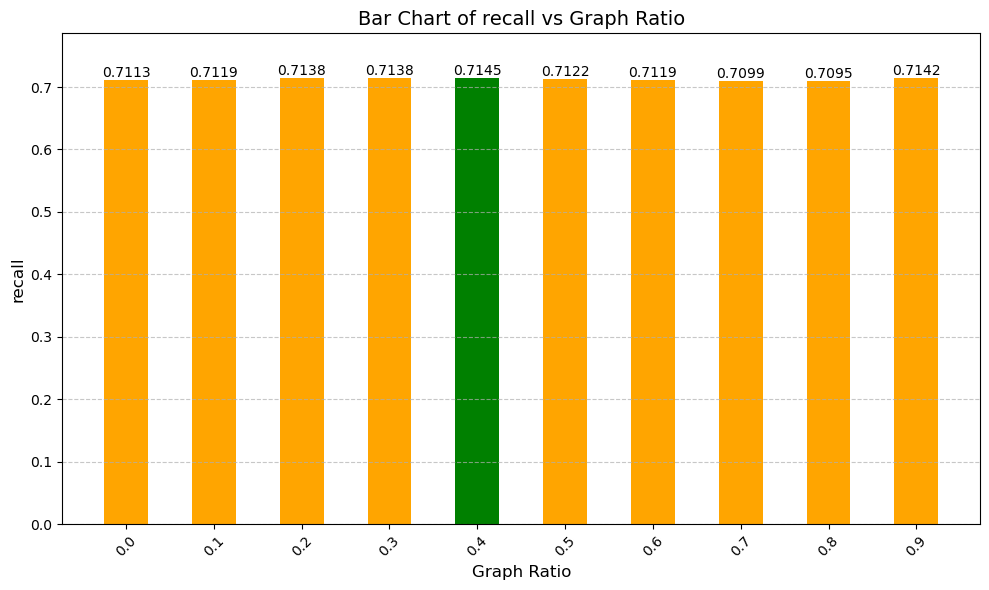

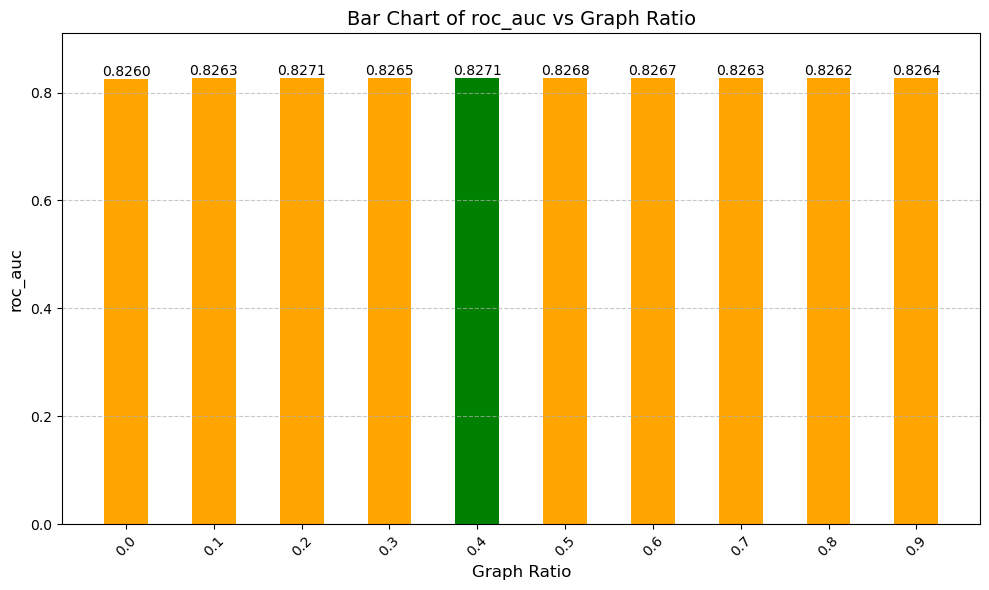

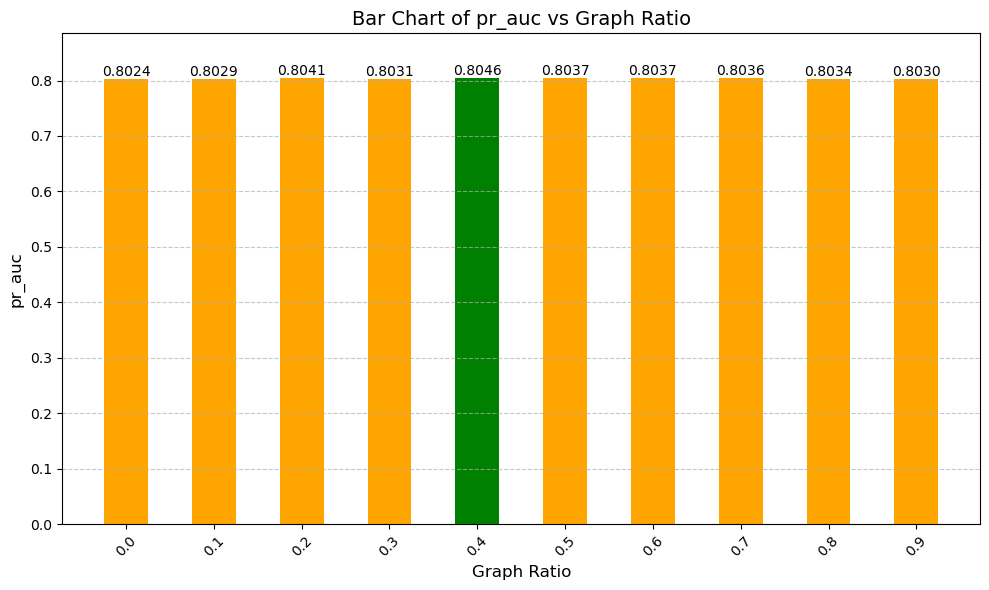

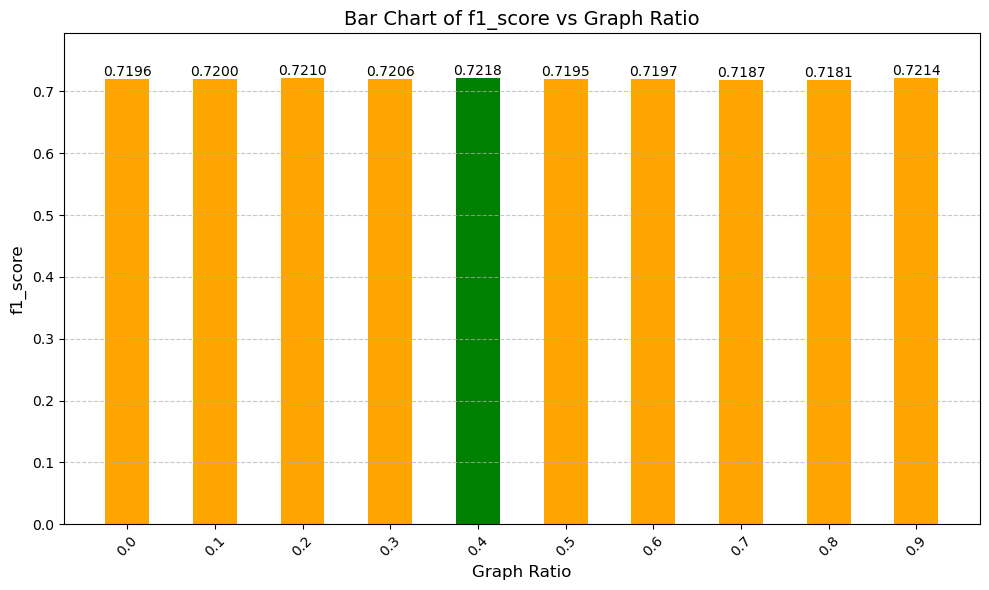

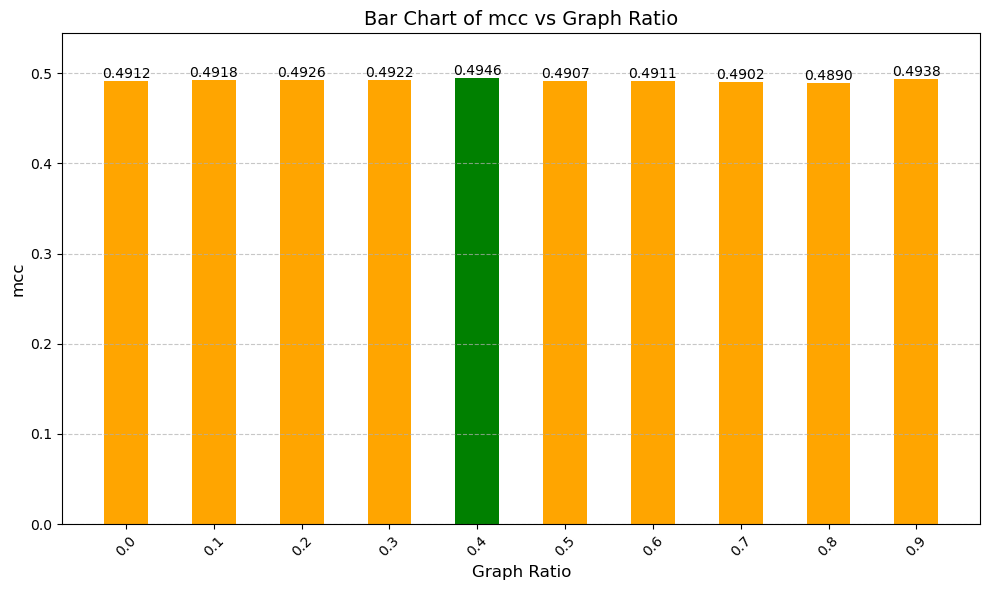

In [244]:
import matplotlib.pyplot as plt

x = merged_df['graph_ratio']

# Create a bar chart for each column (other than graph_ratio)
columns_to_plot = columns_to_plot = [col for col in merged_df.columns if col != 'graph_ratio']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Find the index of the maximum value
    max_idx = merged_df[column].idxmax()
    min_idx = merged_df[column].idxmin()
    
    # Set bar colors (different color for the highest value)
    if column != "loss":
        colors = ['orange' if i != max_idx else 'green' for i in range(len(merged_df))]
    else:
        colors = ['orange' if i != min_idx else 'green' for i in range(len(merged_df))]
    
    # Plot the bars
    bars = plt.bar(x, merged_df[column], color=colors, width=0.05)
    
    # Add value labels on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)
    
    # Adjust the y-axis limit to be relative to the maximum value
    plt.ylim(0, merged_df[column].max() * 1.1)
    
    # Title and labels
    plt.title(f'Bar Chart of {column} vs Graph Ratio', fontsize=14)
    plt.xlabel('Graph Ratio', fontsize=12)
    plt.ylabel(column, fontsize=12)
    
    # Ensure x-axis shows all graph_ratio labels
    plt.xticks(x, labels=[f'{val:.1f}' for val in x], rotation=45)
    
    # Show grid lines for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [245]:
merged_df

,graph_ratio,loss,accuracy,precision,recall,roc_auc,pr_auc,f1_score,mcc
0,0.0,0.536547,0.748002,0.728935,0.711327,0.826002,0.802354,0.719572,0.491202
1,0.1,0.535557,0.748310,0.729220,0.711890,0.826283,0.802863,0.720012,0.491827
2,0.2,0.534181,0.748688,0.728941,0.713845,0.827060,0.804134,0.720993,0.492554
3,0.3,0.536237,0.748525,0.728402,0.713837,0.826535,0.803123,0.720633,0.492157
4,0.4,0.534606,0.749709,0.730089,0.714545,0.827142,0.804601,0.721774,0.494576
5,0.5,0.534137,0.747745,0.728056,0.712152,0.826752,0.803714,0.719492,0.490742
6,0.6,0.535253,0.747995,0.728523,0.711902,0.826655,0.803701,0.719675,0.491111
7,0.7,0.535372,0.747463,0.728956,0.709938,0.826334,0.803633,0.718718,0.490212
8,0.8,0.535572,0.746929,0.727906,0.709523,0.826248,0.803436,0.718051,0.488968
9,0.9,0.535321,0.749280,0.729619,0.714174,0.826409,0.803009,0.721397,0.493770
